In [273]:
import pandas as pd

In [274]:
df=pd.read_csv("train.csv")

In [275]:
 df.shape
    

(891, 12)

In [276]:
df.count()


PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [277]:
import matplotlib.pyplot as plt

In [278]:
fig = plt.figure(figsize=(18,6))



<Figure size 1296x432 with 0 Axes>

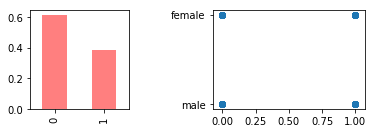

In [279]:
plt.subplot2grid((2,3),(0,0))
df.Survived.value_counts(normalize=True).plot(kind="bar", alpha=0.5, color='red')
plt.subplot2grid((2,2),(0,1))
plt.scatter(df.Survived,df.Sex,alpha=0.1)
plt.show()



In [280]:
 from sklearn import tree,preprocessing,model_selection

 train=pd.read_csv("train.csv")  

In [281]:
train.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)

train["Fare"]=train["Fare"].fillna(train["Fare"].dropna().median())
train["Age"]=train["Age"].fillna(train["Age"].dropna().median())


train.loc[train["Sex"]=="male","Sex"]=0
train.loc[train["Sex"]=="female","Sex"]=1

train["Embarked"]=train["Embarked"].fillna("S")
train.loc[train["Embarked"]=="S","Embarked"]=0
train.loc[train["Embarked"]=="C","Embarked"]=1
train.loc[train["Embarked"]=="Q","Embarked"]=2
train


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0
5,6,0,3,0,28.0,0,0,8.4583,2
6,7,0,1,0,54.0,0,0,51.8625,0
7,8,0,3,0,2.0,3,1,21.0750,0
8,9,1,3,1,27.0,0,2,11.1333,0
9,10,1,2,1,14.0,1,0,30.0708,1


In [282]:
target=train["Survived"].values
target.shape

(891,)

In [283]:
feature_names=["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]
features=train[feature_names].values


(891, 7)

In [284]:
generalised_desision_tree=tree.DecisionTreeClassifier(
    random_state=1,
    max_depth=8,
    min_samples_split=15
)
generalised_desision_tree_=generalised_desision_tree.fit(features,target)
scores=model_selection.cross_val_score(generalised_desision_tree,
features,target,
scoring='accuracy',
cv=150)

In [289]:
test=pd.read_csv("test.csv")
test.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)

test["Fare"]=test["Fare"].fillna(test["Fare"].dropna().median())
test["Age"]=test["Age"].fillna(test["Age"].dropna().median())


test.loc[test["Sex"]=="male","Sex"]=0
test.loc[test["Sex"]=="female","Sex"]=1

test["Embarked"]=test["Embarked"].fillna("S")
test.loc[test["Embarked"]=="S","Embarked"]=0
test.loc[test["Embarked"]=="C","Embarked"]=1
test.loc[test["Embarked"]=="Q","Embarked"]=2
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,2
1,893,3,1,47.0,1,0,7.0000,0
2,894,2,0,62.0,0,0,9.6875,2
3,895,3,0,27.0,0,0,8.6625,0
4,896,3,1,22.0,1,1,12.2875,0
5,897,3,0,14.0,0,0,9.2250,0
6,898,3,1,30.0,0,0,7.6292,2
7,899,2,0,26.0,1,1,29.0000,0
8,900,3,1,18.0,0,0,7.2292,1
9,901,3,0,21.0,2,0,24.1500,0


In [290]:
scores.mean()

0.8331746031746032

In [297]:
feature_names=["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]
features2=test[feature_names].values
X=generalised_desision_tree.predict(features2)
X.shape



(418,)

In [298]:
submission = pd.DataFrame()
submission['PassengerId'] = test.PassengerId
submission['Survived'] = pd.Series(X)
submission.to_csv("kaggle.csv", index=False)


In [304]:
scores.mean()

0.8331746031746032

AttributeError: 'DataFrame' object has no attribute 'Survived'